In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load/print five SA-LTMR traces
for i in range(1,6):
    loaded_array = np.load('saltmr_trace{}.npy'.format(i))
    print(loaded_array)


[0.01306 0.03484 0.05214 0.08268 0.11132 0.2301  0.2806  0.38642]
[0.01332 0.01976 0.46826]
[0.01044 0.01862 0.03104 0.04412 0.05932 0.07422 0.09064 0.1106  0.13098
 0.15368 0.1745  0.19636 0.2212  0.25094 0.27842]
[0.0114  0.02458 0.0379  0.05246 0.10442 0.13728 0.15572 0.19504 0.26122
 0.271   0.2856  0.31726 0.37054 0.38512 0.40172 0.4788 ]
[0.00844 0.01186 0.01706 0.0261  0.0319  0.03628 0.04656 0.0549  0.06074
 0.07172 0.07642 0.0896  0.09578 0.11014 0.11602 0.12806 0.13632 0.1463
 0.15058 0.1645  0.17138 0.1772  0.1963  0.20858 0.21732 0.22558 0.2382
 0.24286 0.25182 0.2586  0.2693  0.27564 0.28436 0.29882 0.31476 0.32708
 0.33882 0.35406 0.36356 0.37802 0.40316 0.40852 0.42202 0.42616 0.432
 0.4382  0.4521  0.4613  0.46772 0.48028 0.48578]


In [4]:
def generate_onset_times(frequency, duration=0.5):
    # Calculate time interval based on frequency
    time_interval = 1 / frequency
    
    # Generate onset times within the specified duration
    onset_times = np.arange(0, duration, time_interval)
    
    return onset_times

# Example usage
frequency = 5  # Frequency in Hz
onset_times = generate_onset_times(frequency)

print("Onset times:", onset_times)

Onset times: [0.  0.2 0.4]


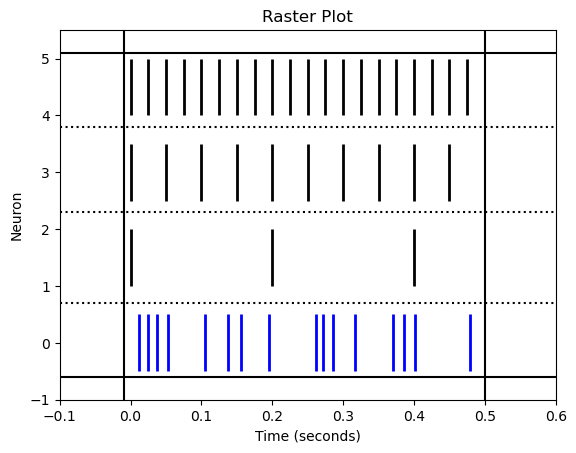

In [5]:
fig, ax = plt.subplots()


saltmr_array = np.load('saltmr_trace4.npy')
five_hz = generate_onset_times(5)
twenty_hz = generate_onset_times(20)
fourty_hz = generate_onset_times(40)

arrays = [saltmr_array,five_hz,twenty_hz,fourty_hz]
colors = ['blue', 'black', 'black', 'black'] # Define colors for each line

# Define the space between rows
row_space = 0.5

for i, (array, color) in enumerate(zip(arrays, colors)):
    # Plot spikes as vertical lines for each onset array
    ax.vlines(array, i - 0.5 + i * row_space, i + 0.5 + i * row_space, colors=color, linewidth=2)

# adjust the raster plot
ax.set_xlim(-.1, 0.6)  # x-axis limits
ax.set_ylim(-1, len(arrays) - 0.5 + (len(arrays) - 1) * row_space + 0.5) 
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Neuron')
ax.set_title('Raster Plot')

plt.axvline(x=-0.01 , linestyle='-', color='black')
plt.axvline(x=0.5 , linestyle='-', color='black')
plt.axhline(y=5.1 , linestyle='-', color='black')
plt.axhline(y=-0.6 , linestyle='-', color='black')

plt.axhline(y=0.7 , linestyle=':', color='black')
plt.axhline(y=2.3 , linestyle=':', color='black')
plt.axhline(y=3.8 , linestyle=':', color='black')


# Show the plot
plt.show()

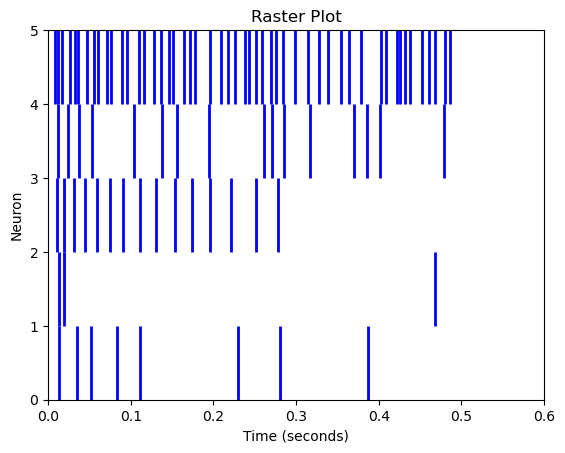

In [3]:
# create a raster plot of all five SA-LTMR traces
fig, ax = plt.subplots()

for i in range(1,6):
    loaded_array = np.load('saltmr_trace{}.npy'.format(i))

    # Plot spikes as vertical lines for each onset array
    ax.vlines(loaded_array, (i-1), (i), colors='b', linewidth=2, label='Neuron {}'.format(i))

# adjust the raster plot
ax.set_xlim(0, 0.6)  # x-axis limits
ax.set_ylim(0, 5)   # y-axis limits based on the number of neurons
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Neuron')
ax.set_title('Raster Plot')

# Show the plot
plt.show()

In [ ]:
#Make do_out laser output for a given firing pattern from an empirical trace (i.e., trace_array)

#Extract spike onset times from "saltmr_trace4.npy"
trace_oi = 4
Fs = 30000
trace_array = np.load('saltmr_trace{}.npy'.format(trace_oi))
#print(trace_array)


## Five sets of 0.5 second trains of 0.3ms laser pulses in an empirically-observed SA-LTMR pattern. 
# 5 seconds off between trains.
laser_duration = 0.0003  # seconds
train_duration = 0.5 # seconds

rest_duration = 5 # seconds
start_buffer = 1 # seconds
trial_duration = (2* start_buffer) + (5 * (train_duration + rest_duration)) - rest_duration + 1
print(trial_duration)

do_out = np.zeros((2, int(Fs * trial_duration)), dtype=bool)
print(len(do_out[0])/Fs)

train_onsets = np.arange((start_buffer), (trial_duration), ((train_duration + rest_duration))) * Fs
print(train_onsets)

laser_onsets = np.round(trace_array * Fs).astype(int)
print(laser_onsets)

for train_onset in train_onsets:
    for laser_onset in laser_onsets:
        start_index = int(train_onset + laser_onset)
        end_index = int(start_index + (laser_duration * Fs))
        do_out[0, start_index:end_index] = True

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the raster of the trace array firing pattern
plt.subplot(2, 1, 1)
plt.eventplot(trace_array, colors='black', linewidths=2)
plt.title('Trace Array Firing Pattern')
plt.xlabel('Time (seconds)')
plt.ylabel('Neuron Index')


# Plot the raster of do_out[0] events for the first few seconds
plt.subplot(2, 1, 2)
event_indices = np.where(do_out[0])[0]
plt.eventplot(event_indices[event_indices < trial_duration * Fs] / Fs, colors='black', linewidths=2)
plt.title('do_out[0] Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Index')
plt.xlim(0, trial_duration)  # Adjust the xlim based on the desired time range

# # Plot vertical lines at every onset
# onset_indices = np.where(np.diff(do_out[0]) == 1)[0] + 1
# onset_times = onset_indices / Fs
# plt.vlines(onset_times, 0, 2, color='red', linestyle='--', label='Onset')

plt.legend()
plt.tight_layout()

plt.show()




In [3]:
from datetime import datetime 

settings = {
    'xMirror_output': 'PXI1Slot2/ao0',
    'yMirror_output': 'PXI1Slot2/ao1',
    'laser_output': '/PXI1Slot2/port0/line0',
    'sync': '/PXI1Slot2/port0/line1', #output to trigger NP recording

    'Fs': 30000,  # in samples/s
    'minV' : -.25, # in Volts. Minimum voltage for mirror
    'maxV' : .25, # in Volts. Maximum voltage for mirror
    'stepV' : .1, # in Volts. Increment of voltage to be stepped for mirror
    'time_per_region' : 0.01 # in seconds. Duration to hold mirrors in place for each region
}


current_date = datetime.now()
date = current_date.strftime('%Y%m%d_%H%M%S')

np.save("C:/Users/aewor/settings_acRecField_{}.npy".format(date), settings)


This experiment will take 4.53 minutes to complete...


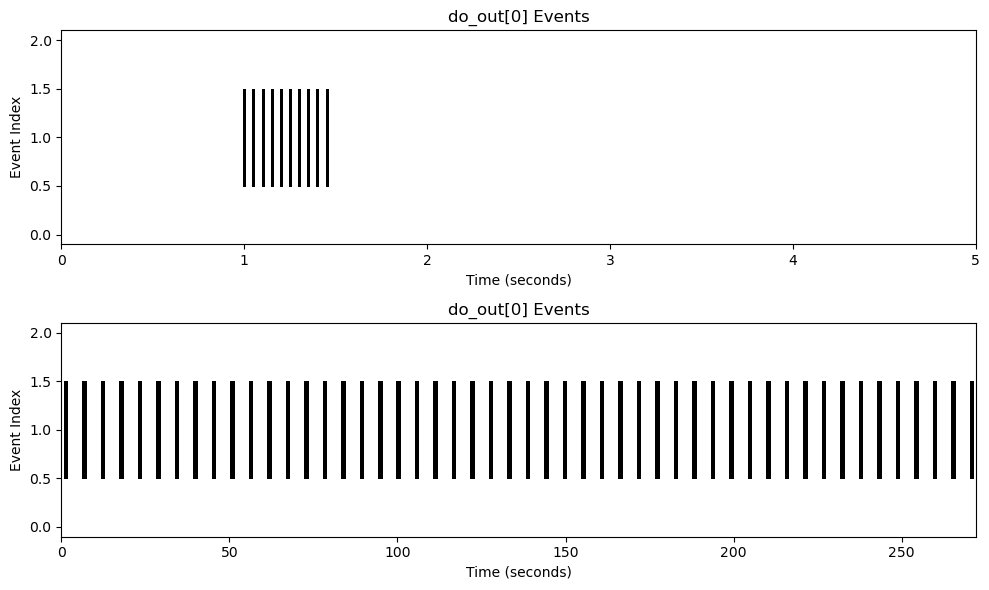

In [8]:
settings = {
    'xMirror_output': 'PXI1Slot2/ao0',
    'yMirror_output': 'PXI1Slot2/ao1',
    'laser_output': '/PXI1Slot2/port0/line0',
    'sync': '/PXI1Slot2/port0/line1', #output to trigger NP recording

    'Fs': 30000,  # in samples/s
    'xV' : -.25, # in Volts. Fixed voltage for mirror's x-axis
    'yV' : .25, # in Volts. Fixed voltage for mirror's y-axis

    'laser_duration' : 0.0003,  # seconds
    'laser_frequency' : 20, # Hz (for sustained pulse, equate to settings['Fs'])
    'train_duration' : 0.5, # seconds
    'rest_duration' : 5, # seconds
    'trial_buffer' : 1, # seconds
    'trial_repeats' : 50 # number of trains to pulse
}

trial_duration = (2 * settings['trial_buffer']) + (settings['trial_repeats'] * (settings['train_duration'] + settings['rest_duration'])) - settings['rest_duration']
minutes = round(trial_duration/60, 2)
print("This experiment will take {} minutes to complete...".format(minutes))

# initialize zeroed-out arrays
numSamples = int(settings['Fs'] * trial_duration)
ao_out = np.zeros((2, numSamples))
do_out = np.zeros((2, int(settings['Fs'] * trial_duration)), dtype=bool)

# Fill ao_out with mirror coordinates
ao_out[0] = np.full(1, settings["xV"])
ao_out[1] = np.full(1, settings["yV"])

# generate a train of laser pulses for settings['laser_duration']seconds at settings['laser_frequency']Hz    
train_onsets = np.arange((settings['trial_buffer']), (trial_duration), ((settings['train_duration'] + settings['rest_duration']))) * settings['Fs']
# Calculate the time points for laser onset within a train
laser_onsets = np.arange(0, settings['train_duration'], 1 / settings['laser_frequency'])
# Convert the time points to sample indices
laser_onsets = (laser_onsets * settings['Fs']).astype(int)

for train_onset in train_onsets:
    for laser_onset in laser_onsets:
        start_index = int(train_onset + laser_onset)
        end_index = int(start_index + (settings['laser_duration'] * settings['Fs']))
        do_out[0, start_index:end_index] = True



# Plot the results
plt.figure(figsize=(10, 6))

# Plot the raster of do_out[0] events for the first few seconds
plt.subplot(2, 1, 1)
event_indices = np.where(do_out[0])[0]
plt.eventplot(event_indices[event_indices < trial_duration * settings['Fs']] / settings['Fs'], colors='black', linewidths=2)
plt.title('do_out[0] Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Index')
plt.xlim(0, 5)  # Adjust the xlim based on the desired time range

# Plot the raster of do_out[0] events for the first few seconds
plt.subplot(2, 1, 2)
event_indices = np.where(do_out[0])[0]
plt.eventplot(event_indices[event_indices < trial_duration * settings['Fs']] / settings['Fs'], colors='black', linewidths=2)
plt.title('do_out[0] Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Index')
plt.xlim(0, trial_duration)  # Adjust the xlim based on the desired time range



#plt.legend()
plt.tight_layout()

plt.show()

